## Лабораторная работа 6
### Вариант 21
# Численное дифференцирование и решение задачи Коши



#### Задача 6.1
Дана  формула численного дифференцирования $f'(x)\approx af(x) + bf(x - 11h) + cf(x + h) + df(x - 5h)$ <br>
Требуется  исследовать поведение погрешностей при численном дифференцировании.
### Порядок решения задачи
1. Определить коэффициенты $a, b, c, d$ так, чтобы формула имела максимальный порядок точности. <br>
2. Реализовать программно полученную формулу численного дифференцирования и формулу правой разностной производной.<br>
3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1. На отрезке $[a,b]$ построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг $h_0=0.0001$ .<br>
4. Взять функцию из задачи 5.2. Выбрать фиксированную точку на отрезке $[a,b]$ и вычислить значения производных  по формулам  численного дифференцирования,  уменьшая шаг дифференцирования  $h_0=0.1$ последовательно в 10 раз: $h_k=h_0*10^{-k}$, $k=0, 1, 2,...$ .Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования.  По полученным данным построить графики погрешностей.<br>
5. Оформить отчет по задаче, содержащий постановку задачи, вывод расчетных формул, полученные результаты,  графики  и код. <br>

#### Решим систему линейных уравнений:
$a+b+c+d=0$<br>
$-11hb+hc-5hd=1$<br>
$(-11h)^2b+h^2c+(-5h)^2d=0$ <br>
$(-11h)^3b+h^3c+(-5h)^3d=0$ <br>

Отсюда:
$a=-\frac{39}{55h}$;
$b=\frac{5}{792h}$;
$c=\frac{55}{72h}$;
$d=-\frac{11}{180h}$;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
C0 = 7.4
C1 = -2.3
C2 = 6.6
C3 = 0.3
C4 = 1.8


def P(x):
    return C0*x**0+C1*x**1+C2*x**2+C3*x**3+C4*x**4

def dP(x):
    return C1+C2*2*x+C3*3*x**2+C4*4*x**3

In [2]:
def F21(x,h):
    a = -39/(55*h)
    b = 5/(792*h)
    c = 55/(72*h)
    d = -11/(180*h)
    return a*P(x) + b*P(x-11*h)+c*P(x+h)+d*P(x-5*h)

def RDD(x,h):
    return (P(x+h)-P(x))/h


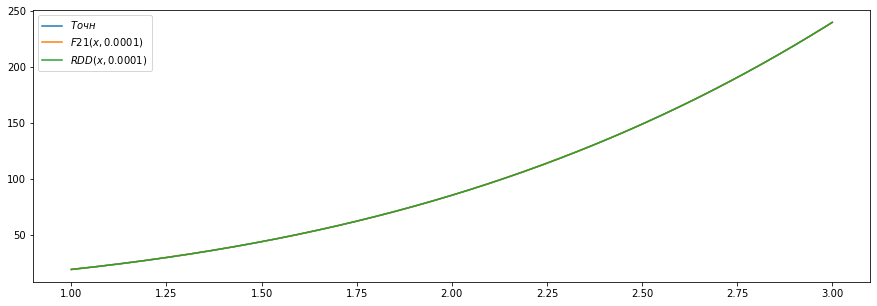

In [3]:
a = 1.0
b = 3.0
h0 = 0.0001
x_data = np.linspace(a, b, 1000)
fig, AxsPogrSN = plt.subplots(figsize=(15, 5))
AxsPogrSN.plot(x_data, dP(x_data), label=f'$Точн$')
AxsPogrSN.plot(x_data, F21(x_data, h0), label=f'$F21(x, {h0})$')
AxsPogrSN.plot(x_data, RDD(x_data, h0), label=f'$RDD(x, {h0})$')
AxsPogrSN.legend()

In [4]:
def F(x):
    return 3*np.exp(x)*np.sin(3*np.pi*x)
def dF(x):
    return 3*np.exp(x)*(np.sin(3*np.pi*x) + 3*np.pi*np.cos(3*np.pi*x))

a=-3
b=0
x=-1
h0=0.1
TrueD = dF(x)
print("Точное значение производной в точке x=-1:  ", TrueD)

Точное значение производной в точке x=-1:   -10.401546148118296


In [5]:
def F21_2(x,h):
    a = -39/(55*h)
    b = 5/(792*h)
    c = 55/(72*h)
    d = -11/(180*h)
    return a*F(x) + b*F(x-11*h)+c*F(x+h)+d*F(x-5*h)

def RDD_2(x,h):
    return (F(x+h)-F(x))/h

def Accuracy10(x,h, TD):
    y1=[]
    y2=[]
    for i in range (10):
        F21_i =F21_2(x,h)
        y1.append(abs(F21_i-TD))
        
        RDD_i =RDD_2(x,h)
        y2.append(abs(RDD_i-TD))
        
        print("i: ", i, "F21_2 value: ", F21_i,", accuracyF21 =", abs(F21_i-TD),"||   RDD_2 value: ", RDD_i,", accuracyRDD =", abs(RDD_i-TD), "|| h = ", h,'\n')
        h/=10
        
    return y1, y2
        
y1_data = []
y2_data = []
y1_data, y2_data = Accuracy10(x, h0, TrueD)

i:  0 F21_2 value:  -7.147481598618151 , accuracyF21 = 3.2540645495001455 ||   RDD_2 value:  -9.867652923821533 , accuracyRDD = 0.5338932242967633 || h =  0.1 

i:  1 F21_2 value:  -10.388947216611006 , accuracyF21 = 0.012598931507289635 ||   RDD_2 value:  -10.49053669816778 , accuracyRDD = 0.08899055004948409 || h =  0.01 

i:  2 F21_2 value:  -10.401537279884236 , accuracyF21 = 8.868234059988822e-06 ||   RDD_2 value:  -10.41179875467326 , accuracyRDD = 0.010252606554963961 || h =  0.001 

i:  3 F21_2 value:  -10.401546139691368 , accuracyF21 = 8.426928488347585e-09 ||   RDD_2 value:  -10.40258481469885 , accuracyRDD = 0.0010386665805537376 || h =  0.0001 

i:  4 F21_2 value:  -10.401546148088347 , accuracyF21 = 2.994937631228822e-11 ||   RDD_2 value:  -10.401650148659012 , accuracyRDD = 0.00010400054071624254 || h =  1e-05 

i:  5 F21_2 value:  -10.40154614807647 , accuracyF21 = 4.18260981405183e-11 ||   RDD_2 value:  -10.401556549473838 , accuracyRDD = 1.0401355542200008e-05 || h = 

|Точное значение производной x=-1: -10.401546148118296|F21_2|accuracyF21|RDD_2|accuracyRDD|h|
|:---------------------------------------------------:|:---:|:---------:|:---:|:---------:|::|
|0|-7.147481598618151|3.2540645495001455|-9.867652923821533|0.5338932242967633|0.1|
|1|-10.388947216611006|0.012598931507289635|-10.49053669816778|0.08899055004948409|0.01|
|2|-10.401537279884236|8.868234059988822e-06|-10.41179875467326|0.010252606554963961|0.001|
|3|-10.401546139691368|8.426928488347585e-09|-10.40258481469885|0.0010386665805537376|0.0001|
|4|-10.401546148088347|2.994937631228822e-11|-10.401650148659012|0.00010400054071624254|1.0000000000000002e-06|
|5|-10.40154614807647|4.18260981405183e-11|-10.401556549473838|1.0401355542200008e-05|1.0000000000000002e-06|
|6|-10.4015461421357|5.982595752129782e-09|-10.401547180387778 |1.0322694823372558e-06|1.0000000000000002e-07|
|7|-10.40154611815478|2.996351611272985e-08|-10.401546224645546|7.652725031448426e-08|1.0000000000000002e-08|
|8|-10.401545602792611|5.453256850529442e-07|-10.401545542894997|6.052232990327866e-07|1.0000000000000003e-09|
|9|-10.401548379114423|2.2309961273947465e-06|-10.401549454444579|3.306326282981331e-06|1.0000000000000003e-10|

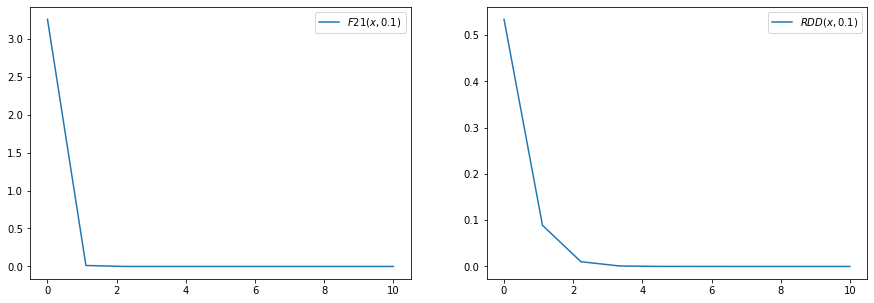

In [6]:
x_data = np.linspace(0, 10, 10)
fig, Axs = plt.subplots(1, 2, figsize=(15, 5))
Axs[0].plot(x_data, y1_data, label=f'$F21(x, {h0})$')
Axs[1].plot(x_data, y2_data, label=f'$RDD(x, {h0})$')
Axs[0].legend()
Axs[1].legend()

По графикам погрешностей можно сказать, что для метода по первой формуле численного дифференцирования оптимальное количество шагов равно 1, а для Правой разностной производной равно 3.

#### Задача 6.2
Найти  приближенное решение  задачи Коши для обыкновенного дифференциального  уравнения (ОДУ) 1 порядка с точностью $\varepsilon = 10^{-6}$.<br>
$y' = r(t)y(t)$ $t\in[t_0, T]$, <br>
$y(t_0)=y_0$ 
### Порядок решения задачи
1. Найти аналитическое решение задачи<br>  
2.Составить  программу вычисления  решения  методом Эйлера с  заданной точностью, используя правило Рунге. Найти решение задачи с точностью $\varepsilon = 10^{-6}$,число точек $N$ и шаг, при котором точность достигается. Построить график решения.<br>
3. Составить  программу вычисления  решения с  заданной точностью методом 
индивидуального варианта. Найти решение задачи с заданной точностью,   число точек N и шаг, при котором точность достигается. Построить график решения задачи.<br>
4. Сравнить полученные результаты.<br> 
5. Оформить отчет по задаче <br>

## $y'= (-cos(3t)-0.1)y$,  $t \in [\frac{\pi}{6}, \frac{\pi}{2}]$
## $y(\frac{\pi}{6}) = 0.68$

#### Решение задачи Коши:
## $y=e^{-0.1t-\frac{sin(3t)}{3}}$

Стартовую точку у0 возьмем из условия: у0 = 0.68<br>
у1 вычислим по аналитически найденной функции:y1 = у(t0+h)

In [7]:

def y(t):
    return np.exp(-0.1*t-(np.sin(3*t))/3)

def r(t):
    return -np.cos(3*t)-0.1

def Eyler(t0, T, y0, h):
    N = int((T-t0)/h)+1
    Y = []
    Y.append(y0)
    for i in range(1, N):
        Y.append(Y[i - 1] + h*r(t0 + h*(i - 1))*Y[i - 1])
    Y1 = np.array(Y)    
    return Y1, N, h
    
def REyler(t0, T, y0, h0, e):
    R=[]
    Y1, N1, h1 =Eyler(t0, T, y0, h0)
    Y2, N2, h2 =Eyler(t0, T, y0, h0/2)
    for i in range(N1):
        R.append(abs(Y1[i] - Y2[2*i]))
    while(e<max(R)):
        R=[]
        Y1, N1, h1 = Y2,N2,h2
        Y2, N2, h2 =Eyler(t0, T, y0, h1/2)
        for i in range(N1):
            R.append(abs(Y1[i] - Y2[2*i]))
    return Y2, N2, h2
        
def ExtraAdams2(t0, T, y0, h):
    N=int((T-t0)/h)+1
    Y=[]
    Y.append(y0)
    Y.append(y(t0+h))
    for i in range(2, N):
        Y.append(Y[i-1]+h/2*(3*r(t0+h*(i-1))*Y[i-1]-r(t0+h*(i-2))*Y[i-2]))
    Y1=np.array(Y)
    return Y1, N, h
    
def RExtraAdams2(t0, T, y0, h0, e):
    R=[]
    Y1, N1, h1 =ExtraAdams2(t0, T, y0, h0)
    Y2, N2, h2 =ExtraAdams2(t0, T, y0, h0/2)
    for i in range(N1):
        R.append(abs(Y1[i] - Y2[2*i]))
    while(e<max(R)):
        R=[]
        Y1, N1, h1 = Y2,N2,h2
        Y2, N2, h2 =ExtraAdams2(t0, T, y0, h1/2)
        for i in range(N1):
            R.append(abs(Y1[i] - Y2[2*i]))
    return Y2, N2, h2

t0 = np.pi/6 
T = np.pi/2
y0 = 0.68
h0 = 0.1
e = 10**(-6)
YEyler, NEyler, hEyler = REyler(t0, T, y0, h0, e)
print("Eyler: N = ", NEyler, "| h = ", hEyler)
YAdams, NAdams, hAdams = RExtraAdams2(t0, T, y0, h0, e)
print("Adams: N = ", NAdams, "| h = ", hAdams)

Eyler: N =  686292 | h =  1.52587890625e-06
Adams: N =  5362 | h =  0.0001953125


-1.5255702166427909e-05


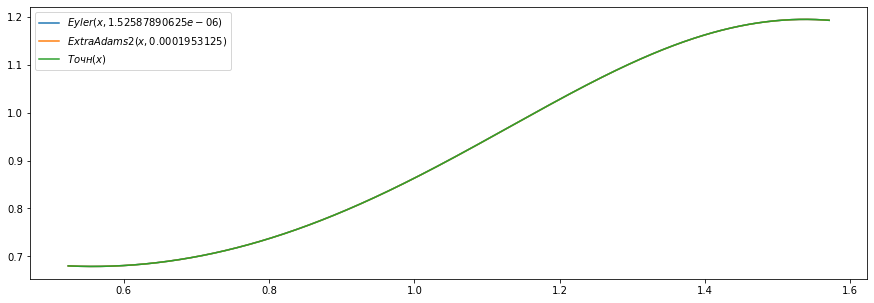

In [8]:
a = np.pi/6 
b = np.pi/2
x_data = np.linspace(a, b, 1000)
x_dataEyler = np.linspace(a, b, NEyler)
x_dataAdams = np.linspace(a, b, NAdams)
fig, AxsPogrSN = plt.subplots(figsize=(15, 5))

AxsPogrSN.plot(x_dataEyler, YEyler, label=f'$Eyler(x, {hEyler})$')
AxsPogrSN.plot(x_dataAdams, YAdams, label=f'$ExtraAdams2(x, {hAdams})$')
AxsPogrSN.plot(x_data, y(x_data), label=f'$Точн(x)$')
AxsPogrSN.legend()

print(y(np.pi/2) - YAdams[len (YAdams) - 1])

In [2]:
def simp(a, ):
    return a @ b
simp()

NameError: name 'a' is not defined